In [16]:
from sklearn import datasets
import numpy as np

In [12]:
df = datasets.load_iris()
print(df.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


### Problem 1

Implement your own K-means algorithm through the following method:
##### Algorithm

- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters

>1. Pick $k$ random objects as the initial $\mu_i$ prototypes
>0. Find for each object the closest prototype and assign to that cluster
>0. Calculate the averages for each cluster to get new $\mu_i$
>0. Repeat until convergence


In [260]:
import numpy as np
class Clusters: 
    """A container for clusters for the k-means algorithm"""
    clusters = []
    points = np.array([]) 
    visited_points = dict()
    converged = False
    
    
    def __init__(self, points):
        self.points = np.array(points)
        
    
    # Take k points and instantiate clusters using them. TODO: Return a value error if number of clusters > number of points
    def instantiate_clusters(self, k):
        k_points = np.random.choice(self.points, size=k)
        for point in k_points:
            c = Cluster()
            c.add_point(point)
            self.clusters.append(c)
            visited_points[tuple(point)] = len(self.clusters)
        
        for point in self.points:
            if point in visited_points.keys():
                continue
            else:
                self.add_to_closest_cluster(point)
            
            
    
    def add_to_closest_cluster(self, point): # perhaps just do a "add point to closest cluster option?"
        # Remove the point from any cluster it happens to be in
        if point in visited_points.keys():
            cluster = clusters[visited_points[tuple(point)]] # needs to be a tuple for hashing purposes
            cluster.remove_point(point)
        
        # get the distances from the point to all the clusters.
        distances = [cluster.get_distance(point) for cluster in self.clusters]
        min_distance_cluster = self.clusters[argmin(distances)]
        min_distance_cluster.add_point(point)
        visited_points[tuple(point)] = min_distance_cluster
        
            

    def iterate_cluster(self, convergence_criterion):
        save_state = dict(visited_points)
        for point in points:
            self.add_to_closest_cluster(point)
        differences = set(self.visited_points.items()) ^ set(save_state.items())
        if len(differences) < convergence_criterion:
            self.converged = True
            
    def fit(self, convergence_criterion = 10, n_iter = 20):
        iters = 0
        if convergence is False and iters < n_iter:
            self.iterate_cluster(convergence_criterion)
            
    def predict(self, points):
        labels = []
        for point in points:
            distances = []
            for cluster in self.Clusters:
                distances.append(cluster.get_distance(point))
            labels.append(np.argmin(distances))
        return labels
                


class Cluster:
    """A cluster for the k-means algorithm"""
    point_set = set() 
    var_totals = None 
    centroid = None # np.array, with the coordinates of the centroid.
    
    
    # retrieve the distance to the centroid from a particular point
    def get_distance(self, point):
        return np.linalg.norm(self.centroid - point)
    
    
    # retrieve distances from the centroid to set of points
    def get_distances(self, points):
        return [np.linalg.norm(self.centroid - point) for point in points]
            
        
    # add a point to the cluster and update centroid and the list of points in the cluster
    def add_point(self, point):
        if isinstance(self.centroid,type(None)):
            self.centroid = point
            self.var_totals = point
            point_set.add(tuple(point))
        elif len(point) != len(centroid):
            return "ERROR ERROR!!!"
        else:
            var_totals += point
            centroid = var_totals/len(point_set)
            
            
    # remove a point from the cluster and update centroid and the list of points
    def remove_point(self, point):
        if tuple(point) in point_set:
            # remove it from the set and update the centroid
            point_set.remove(tuple(point))
            var_totals -= point
            if len(point_set) == 0:
                centroid = None
            else:
                centroid = var_totals/len(point_set)
        else:
            # return error and do nothing
            return "ERROR, point not found in cluster"

#### Problem 1.2.1

 Use the sklearn kmeans clustering algorithm, and the wine quality data set from sklearn. Using the elbow curve, decide how many clusters to use. 

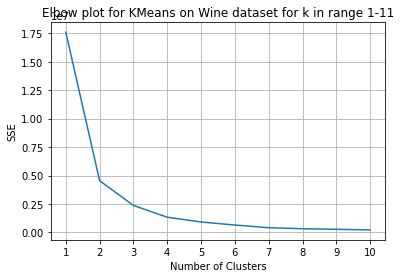

In [248]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wine_dataset = load_wine()
wine_data = wine_dataset['data']
wine_targets = wine_dataset['target']

# Find the inertia values for each considered cluster count
sse = [] 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(wine_data)
    sse.append(kmeans.inertia_)
    
# Plot the results
plt.plot(range(1, 11), sse)
plt.title("Elbow plot for KMeans on Wine dataset for k in range 1-11")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid()
plt.show()

### Answer
Either 2 or 3 values makes sense.


### 1.2.2 Plot Kmeans prediction
Take the prediction by Kmeans on the full dataset, and plot it, selecting two features to plot. 
If you need me to specifically give you direction as to which features to use, you may use the first and second feature, which are the content of alcohol and malic acid.

Plot the same columns with the true values shown. Compare your predicted scatter plot to the correct one.

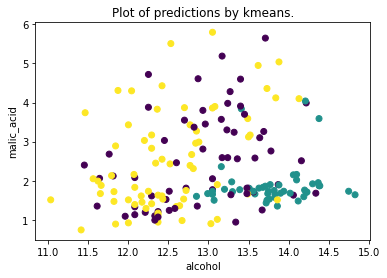

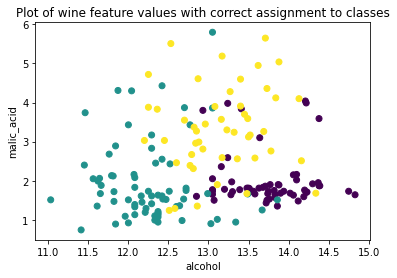

In [109]:
kmeans = KMeans(n_clusters=3, n_init=100)
kmeans.fit(wine_data)
predictions = kmeans.predict(wine_data)

# assign which columns of the data to plot as a variable
column_x = 0
column_y = 1

plt_column_x = wine_data[:,column_x]
plt_column_y = wine_data[:,column_y]

# Plot the predicted clusters
predictions = kmeans.predict(wine_data)
wine_data_for_plotting = wine_data[:,:2]
plt.scatter(plt_column_x, plt_column_y, c = predictions)
plt.title("Plot of predictions by kmeans.")
plt.xlabel(wine_dataset['feature_names'][column_x])
plt.ylabel(wine_dataset['feature_names'][column_y])
plt.show()


#Plot the actual clusters
plt.scatter(plt_column_x, plt_column_y, c = wine_targets)
plt.title("Plot of wine feature values with correct assignment to classes")
plt.xlabel(wine_dataset['feature_names'][column_x])
plt.ylabel(wine_dataset['feature_names'][column_y])
plt.show()

### Plot GMM Prediction 
After training your GMM on the full data set, select the same two columns you chose above, and plot the predicted and true values, as you did above. (in two separate plots)


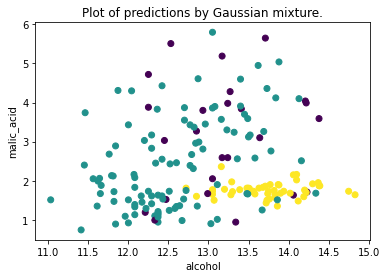

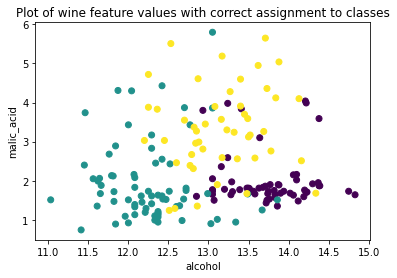

In [108]:
from sklearn.mixture import GaussianMixture
#X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
gm = GaussianMixture(n_components=3, random_state=0).fit(wine_data)

# assign which columns of the data to plot as a variable
column_x = 0
column_y = 1

plt_column_x = wine_data[:,column_x]
plt_column_y = wine_data[:,column_y]


# Plot the predicted clusters
predictions = gm.predict(wine_data)
wine_data_for_plotting = wine_data[:,:2]
plt.scatter(plt_column_x, plt_column_y, c = predictions)
plt.title("Plot of predictions by Gaussian mixture.")
plt.xlabel(wine_dataset['feature_names'][column_x])
plt.ylabel(wine_dataset['feature_names'][column_y])
plt.show()


#Plot the actual clusters
plt.scatter(plt_column_x, plt_column_y, c = wine_targets)
plt.title("Plot of wine feature values with correct assignment to classes")
plt.xlabel(wine_dataset['feature_names'][column_x])
plt.ylabel(wine_dataset['feature_names'][column_y])
plt.show()

### Plot Spectral Clustering Predictions
After training your Spectral Clustering on the full data set, select the same two columns you chose above, and plot the predicted and true values, as you did above. (in two separate plots)


/home/ahenrichsen/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


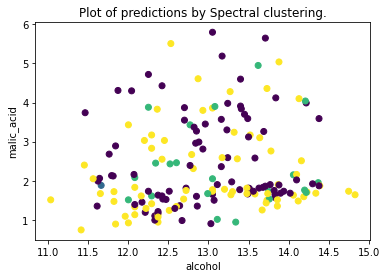

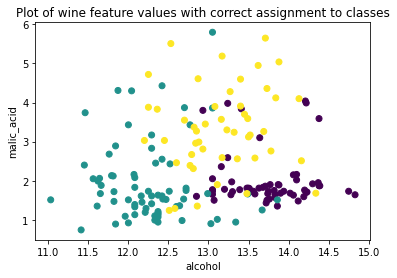

In [261]:
from sklearn.cluster import SpectralClustering

predictions = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=0).fit_predict(wine_data)

plt_column_x = wine_data[:,column_x]
plt_column_y = wine_data[:,column_y]


# Plot the predicted clusters
wine_data_for_plotting = wine_data[:,:2]
plt.scatter(plt_column_x, plt_column_y, c = predictions)
plt.title("Plot of predictions by Spectral clustering.")
plt.xlabel(wine_dataset['feature_names'][column_x])
plt.ylabel(wine_dataset['feature_names'][column_y])
plt.show()


#Plot the actual clusters
plt.scatter(plt_column_x, plt_column_y, c = wine_targets)
plt.title("Plot of wine feature values with correct assignment to classes")
plt.xlabel(wine_dataset['feature_names'][column_x])
plt.ylabel(wine_dataset['feature_names'][column_y])
plt.show()

#### Problem 2

Use an image file with rgb and intensity values for the picture. Note that this is an mxnx4 sized matrix. 
We can compress this into a single mxn matrix with a vector of k = (number of clusters) as a reference by clustering the values so we don't need so many different rgb values. Use spectral clustering for this.

Suggested steps: 
1. load the image file using matplotlib.image. 
0. Consider dividing the array by 255 to bring it to float values of rgb instead of integer values.
0. Unravel the resulting numpy array into a long array with many entries with length 3. (each representing rgb values)
0. Train KMeans on it
0. Go back to the original image array, and replace the rgb values with the centroid values that they are predicted to belong to.

The fact that there are now only a few unique values in the array means that you could replace the entire image with a much smaller file, by having an array saying which centroid to use, and another array containing the values of the centroids.

Display both image files, and ask your friends to guess which one is the compressed one. 

(for appropriately chosen k, I could get about 50% of my friends to guess that the compressed one was actually the original one)



In [249]:
import matplotlib.image as mpimg
img=mpimg.imread('gibbon.jpg')/255

In [250]:
# unravel image to let kmeans train on it
train_set = np.array([img[j,i,:] for j in range(img.shape[0]) for i in range(img.shape[1])])

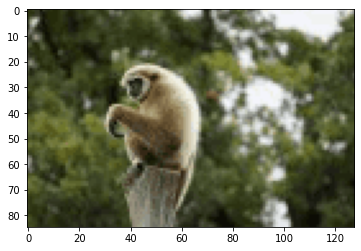

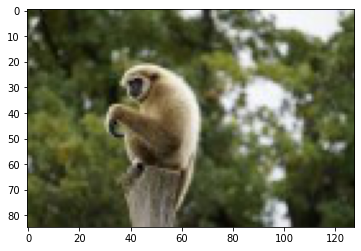

In [251]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, n_init=100).fit(train_set)

# assign centroid values to the 'true' values in the image
result_image = np.array([kmeans.cluster_centers_[kmeans.predict(img[j,:,0:3])] for j in range(img.shape[0])])

# Show the compressed image along with the original image
plt.imshow(result_image)
plt.show()
plt.imshow(img)
plt.show()

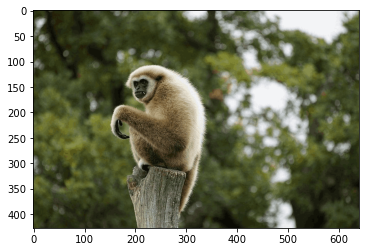

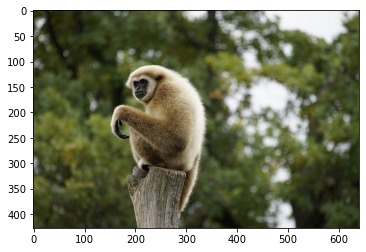

In [254]:
img=mpimg.imread('gibbon_big.jpg')/255

train_set = np.array([img[j,i,:] for j in range(img.shape[0]) for i in range(img.shape[1])])

# Downsample to reduce the needed computation time.
downsampled_indices = np.random.choice(len(train_set), 5000)
downsampled_train_set = train_set[downsampled_indices]
kmeans = KMeans(n_clusters=100, n_init=100).fit(downsampled_train_set)

# re-assign centroid values to the 'true' values in the image
result_image = np.array([kmeans.cluster_centers_[kmeans.predict(img[j,:,0:3])] for j in range(img.shape[0])])

# Show the compressed image along with the original image
plt.imshow(result_image)
plt.show()
plt.imshow(img)
plt.show()